### DM-07 Practice 1  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
csv_in = 'decathlon2016rio.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=8, header=0)
print(df.shape)
print(df.info())
display(df.head())

(20, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           20 non-null     int64 
 1   Name           20 non-null     object
 2   Nationality    20 non-null     object
 3   Result         20 non-null     int64 
 4   100m           20 non-null     int64 
 5   Long_jump      20 non-null     int64 
 6   Shot_put       20 non-null     int64 
 7   High_jump      20 non-null     int64 
 8   400m           20 non-null     int64 
 9   110mH          20 non-null     int64 
 10  Discus_throw   20 non-null     int64 
 11  Pole_vault     20 non-null     int64 
 12  Javelin_throw  20 non-null     int64 
 13  1500m          20 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.3+ KB
None


,Rank,Name,Nationality,Result,100m,Long_jump,Shot_put,High_jump,400m,110mH,Discus_throw,Pole_vault,Javelin_throw,1500m
0,1,Ashton Eaton,United States,8893,985,1045,773,813,1005,1000,777,972,734,789
1,2,Kévin Mayer,France,8834,903,960,836,840,896,972,804,1035,814,774
2,3,Damian Warner,Canada,8666,1023,977,708,840,941,1029,765,819,786,778
3,4,Kai Kazmirek,Germany,8580,910,982,741,896,971,896,731,910,807,736
4,5,Larbi Bourrada,Algeria,8521,917,940,715,896,910,955,713,790,836,849


#### Set data   

In [4]:
dfX = df.loc[:, '100m':]
print(dfX.shape)
display(dfX.head())

(20, 10)


,100m,Long_jump,Shot_put,High_jump,400m,110mH,Discus_throw,Pole_vault,Javelin_throw,1500m
0,985,1045,773,813,1005,1000,777,972,734,789
1,903,960,836,840,896,972,804,1035,814,774
2,1023,977,708,840,941,1029,765,819,786,778
3,910,982,741,896,971,896,731,910,807,736
4,917,940,715,896,910,955,713,790,836,849


#### Standardization  

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

#### PCA  

In [6]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### Check contribution ratio  

In [7]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.36399551 0.19886351 0.12605592 0.09433279 0.08270855 0.05423509
 0.03338784]
[0.36399551 0.56285902 0.68891494 0.78324773 0.86595628 0.92019137
 0.95357921]


**Ans.1: up to PC3 (0.689)**

#### Draw graph of contribution  

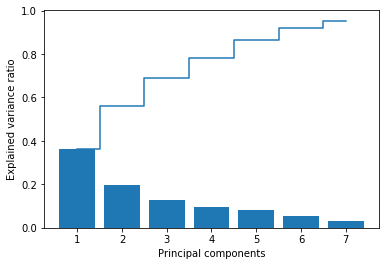

In [8]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### Draw biplot  

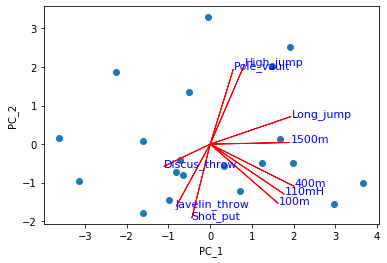

In [9]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 4.5
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)

**Ans: X-axis: running like 1500m, Y-axis: +:jump, -: throw**  